# Steps

1. preprocessing image
2. load model
3. train model
4. prediction
5. validation test set
6. save the model
7. inference with model

In [1]:
# imports

import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

%matplotlib inline

In [2]:
imgpath = './yalefaces/train/subject01.glasses.gif'

In [3]:
# read gif image
image = cv2.VideoCapture(imgpath)
ret,img = image.read()

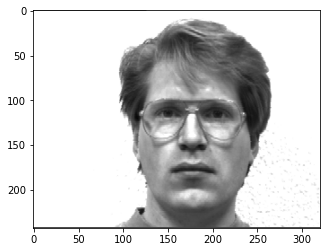

In [4]:
plt.imshow(img)

In [5]:
# image preprocessing
# img_list:numpy format image
# label_list: numpy format label
# cls.train(img_list, np.array(label_list))

In [6]:
# less computation face detector
hog_face_detector = dlib.get_frontal_face_detector()

In [7]:
def getFaceImgLabel(fileName):
    # read image
    cap = cv2.VideoCapture(fileName)
    ret, img = cap.read()
    
    # convert to gray scale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # detect face
    detections = hog_face_detector(img,1)
    
    # check if face detected or not
    if len(detections) > 0:
        # get face coordinate
        x = detections[0].left()
        y = detections[0].top()
        r = detections[0].right()
        b = detections[0].bottom()
        # corp face
        img_corp = img[y:b,x:r]
        
        # eigen need same input image size
        img_corp = cv2.resize(img_corp,(120,120))
        
        # get fece label
        label_id = int(fileName.split('/')[-1].split('.')[0].split('subject')[-1])
        
        return img_corp,label_id
    else:
        return None,-1

In [8]:
imgpath = './yalefaces/train/subject01.glasses.gif'

In [9]:
img,label = getFaceImgLabel(imgpath)

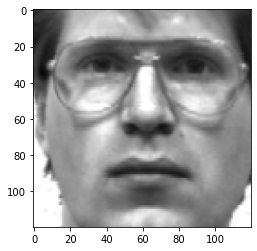

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))

In [11]:
label

1

In [12]:
# iterate train folder for all picture

import glob

img_list = []
label_list = []

file_list = glob.glob('./yalefaces/train/*')
for train_file in file_list:
    # Get picture info based on file name
    img,label = getFaceImgLabel(train_file)
    
    # Filter information
    if label != -1:
        img_list.append(img)
        label_list.append(label)

In [13]:
len(img_list)

132

In [14]:
# create classifier
face_cls = cv2.face.LBPHFaceRecognizer_create()
#face_cls = cv2.face.EigenFaceRecognizer_create()
#face_cls = cv2.face.FisherFaceRecognizer_create()

In [15]:
# train model

face_cls.train(img_list,np.array(label_list))

In [16]:
# test model

test_file = './yalefaces/test/subject05.sleepy.gif'

# Get picture info based on file name
img,label = getFaceImgLabel(test_file)

# Filter information
if label != -1:
    pred_id, distance = face_cls.predict(img)
    print(pred_id)

2


In [17]:
# validate model

file_list = glob.glob('./yalefaces/test/*')
true_id_list = []
pred_id_list = []
for test_file in file_list:
    # Get picture info based on file name
    img,label = getFaceImgLabel(test_file)
    
    # Filter information
    if label != -1:
        pred_id, distance = face_cls.predict(img)
        pred_id_list.append(pred_id)
        true_id_list.append(label)

In [18]:
# get accuracy

from sklearn.metrics import accuracy_score
accuracy_score(true_id_list,pred_id_list)


0.7241379310344828

In [19]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_id_list,pred_id_list)

<AxesSubplot:>

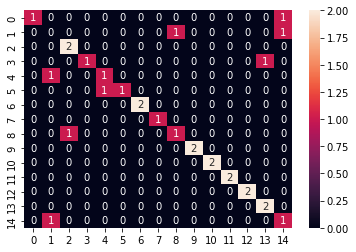

In [20]:
# visualize confusionmatrix use seaborn
import seaborn

seaborn.heatmap(cm,annot=True)

In [23]:
# save model
face_cls.save('./weights/LBPH.yml')

In [26]:
# load model
new_cls = cv2.face.LBPHFaceRecognizer_create()
new_cls.read('./weights/LBPH.yml')

In [30]:
# prediction
test_file = './yalefaces/test/subject03.glasses.gif'

# Get picture info based on file name
img,label = getFaceImgLabel(test_file)
    
# Filter information
if label != -1:
    pred_id, distance = face_cls.predict(img)
    print(pred_id)

3
